<a href="https://colab.research.google.com/github/labib1910024/Python_basic/blob/main/eda_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic = pd.read_csv('/content/Titanic.csv')

In [4]:
titanic.shape

(1313, 5)

In [ ]:
titanic.head()

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


In [5]:
titanic.tail()

,Name,PClass,Age,Sex,Survived
1308,"Zakarian, Mr Artun",3rd,27.0,male,0
1309,"Zakarian, Mr Maprieder",3rd,26.0,male,0
1310,"Zenni, Mr Philip",3rd,22.0,male,0
1311,"Lievens, Mr Rene",3rd,24.0,male,0
1312,"Zimmerman, Leo",3rd,29.0,male,0


In [ ]:
titanic.describe()

,Age,Survived
count,756.000000,1313.000000
mean,30.397989,0.342727
std,14.259049,0.474802
min,0.170000,0.000000
25%,21.000000,0.000000
50%,28.000000,0.000000
75%,39.000000,1.000000
max,71.000000,1.000000


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1313 non-null   object 
 1   PClass    1312 non-null   object 
 2   Age       756 non-null    float64
 3   Sex       1313 non-null   object 
 4   Survived  1313 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [ ]:
titanic.Survived.value_counts()

Survived
0    863
1    450
Name: count, dtype: int64

In [ ]:
titanic["Survived"].value_counts()

Survived
0    863
1    450
Name: count, dtype: int64

In [ ]:
sum(titanic.Survived.isnull())

0

In [ ]:
sum(titanic["Survived"].isnull())

0

In [ ]:
for i in titanic.columns:
  print(i,":",sum(titanic[i].isnull()))

Name : 0
PClass : 1
Age : 557
Sex : 0
Survived : 0


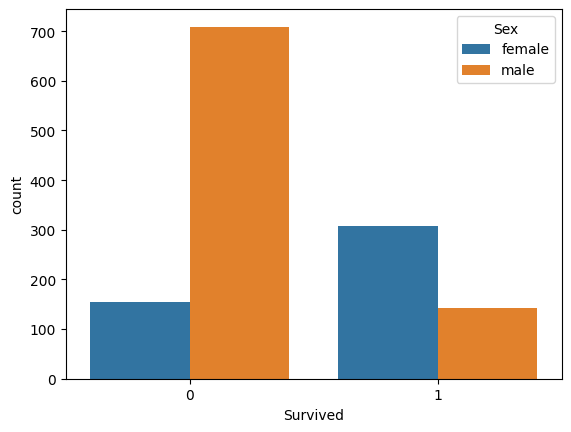

In [ ]:
sns.countplot(x="Survived",data=titanic,hue="Sex")
plt.show()

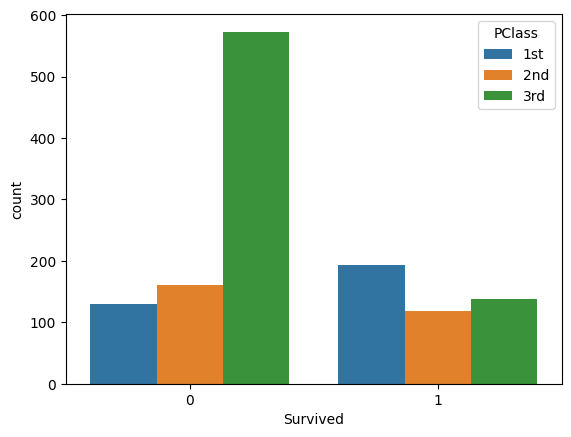

In [ ]:
sns.countplot(x="Survived",data=titanic,hue="PClass")
plt.show()

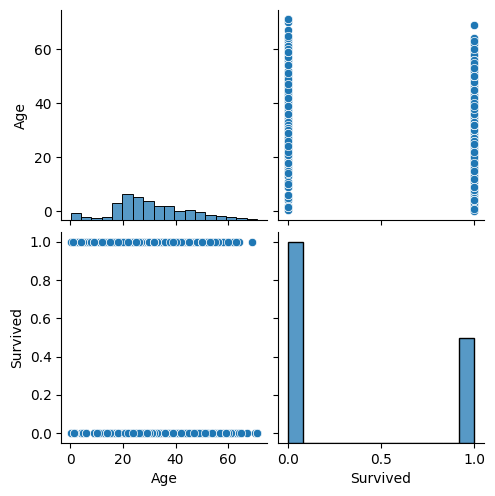

In [ ]:
sns.pairplot(titanic)
plt.show()

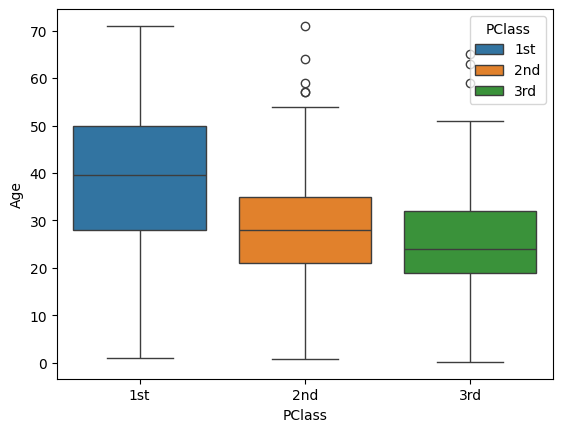

In [ ]:
sns.boxplot(x="PClass",y="Age",data=titanic,hue="PClass")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


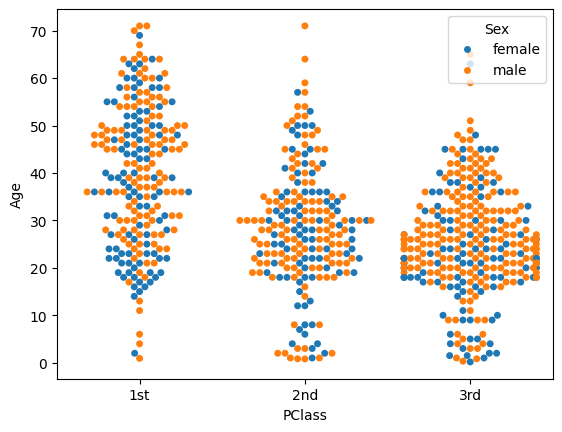

In [ ]:
sns.swarmplot(x="PClass",y="Age",data=titanic,hue="Sex")
plt.show()

In [ ]:
titanic.Age.max()

71.0

In [ ]:
titanic.Age.min()

0.17

In [ ]:
titanic.Age.mean()

30.397989417989418

In [ ]:
titanic.PClass.value_counts()

PClass
3rd    711
1st    322
2nd    279
Name: count, dtype: int64

In [7]:
titanic["PClass"].value_counts()

PClass
3rd    711
1st    322
2nd    279
Name: count, dtype: int64

In [6]:
import pandas as pd


total_survivors = titanic.groupby('PClass')['Survived'].sum()
survivors_by_sex = titanic.groupby(['PClass', 'Sex'])['Survived'].sum()

# Display the results
print("Total number of survivors by PClass:")
print(total_survivors)
print("\nNumber of female and male survivors by PClass:")
print(survivors_by_sex)


Total number of survivors by PClass:
PClass
1st    193
2nd    119
3rd    138
Name: Survived, dtype: int64

Number of female and male survivors by PClass:
PClass  Sex   
1st     female    134
        male       59
2nd     female     94
        male       25
3rd     female     80
        male       58
Name: Survived, dtype: int64


In [10]:
import pandas as pd

total_survivors = titanic.groupby('PClass')['Survived'].sum()
survivors_by_sex = titanic.groupby(['PClass', 'Sex'])['Survived'].sum().unstack()
combined_results = pd.concat([total_survivors, survivors_by_sex], axis=1)
combined_results.columns = ['Total_Survived', 'Female_Survived', 'Male_Survived']

# Display the combined results
print(combined_results)


        Total_Survived  Female_Survived  Male_Survived
PClass                                                
1st                193              134             59
2nd                119               94             25
3rd                138               80             58
